In [113]:
import torch
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [115]:
df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X1', ylabel='X2'>

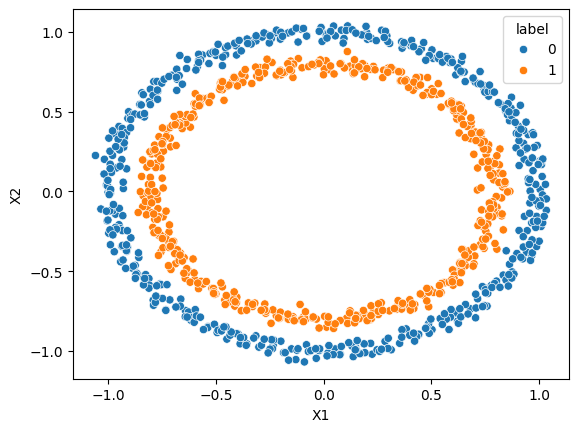

In [116]:
sns.scatterplot(x="X1", y="X2", hue="label", data=df)

In [117]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [120]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [121]:
model = CircleModelV0().to(device)
model

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [122]:
model0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

In [123]:
model

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [124]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5158, -0.5036],
                      [-0.0998, -0.4366],
                      [-0.0785, -0.2813],
                      [-0.4015, -0.6830],
                      [-0.2622,  0.0947]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.1244, -0.6586,  0.5312,  0.5243, -0.4263], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0455,  0.2970, -0.4247, -0.3952,  0.2481]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.0089], device='cuda:0'))])

In [125]:
with torch.inference_mode():
  untrained_preds = model(X_test.to(device)).squeeze()
untrained_preds

tensor([-0.6162, -0.4969, -0.9154, -0.5315, -0.8937, -0.8210, -0.5021, -0.5780,
        -0.9159, -0.4886, -0.6004, -0.5863, -0.5360, -0.9686, -0.9228, -0.6749,
        -0.5245, -0.6453, -0.6787, -0.7278, -0.4902, -0.6840, -0.7177, -0.6899,
        -0.4776, -0.5460, -1.0279, -0.7806, -0.9312, -0.9626, -0.5490, -0.4679,
        -0.5752, -0.9498, -0.5872, -0.5298, -0.5649, -0.9572, -0.9722, -0.9699,
        -0.7309, -0.8799, -0.5315, -0.9293, -0.5604, -0.5203, -0.8804, -0.4829,
        -0.5514, -0.8504, -0.5412, -0.5499, -0.7415, -0.9587, -0.5869, -1.0220,
        -0.6074, -0.9678, -0.8046, -0.8312, -0.8518, -0.5584, -0.8216, -0.9761,
        -0.5981, -0.5417, -0.6811, -0.6450, -0.4761, -0.6769, -0.7692, -0.4596,
        -0.8608, -0.8824, -0.6412, -0.7805, -0.9550, -0.4918, -0.6086, -0.5088,
        -0.7268, -0.6131, -0.5840, -0.9683, -0.7839, -0.5104, -0.8675, -1.0227,
        -0.9847, -0.6770, -0.9456, -0.9518, -0.9461, -0.9066, -0.9715, -0.6318,
        -0.5402, -0.8569, -0.7281, -0.93

In [126]:
loss_fn = nn.BCEWithLogitsLoss() # This is the Sigmoid Function
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [127]:
def accuracy_fn(y_pred, y_test):
  correct = torch.eq(y_pred, y_test).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [128]:
y_pred_probs = torch.sigmoid(untrained_preds)
y_pred_probs

tensor([0.3506, 0.3783, 0.2859, 0.3702, 0.2904, 0.3056, 0.3770, 0.3594, 0.2858,
        0.3802, 0.3543, 0.3575, 0.3691, 0.2752, 0.2844, 0.3374, 0.3718, 0.3441,
        0.3365, 0.3257, 0.3799, 0.3354, 0.3279, 0.3341, 0.3828, 0.3668, 0.2635,
        0.3142, 0.2827, 0.2763, 0.3661, 0.3851, 0.3600, 0.2789, 0.3573, 0.3706,
        0.3624, 0.2774, 0.2744, 0.2749, 0.3250, 0.2932, 0.3702, 0.2831, 0.3635,
        0.3728, 0.2931, 0.3816, 0.3655, 0.2993, 0.3679, 0.3659, 0.3227, 0.2771,
        0.3574, 0.2646, 0.3526, 0.2753, 0.3091, 0.3034, 0.2991, 0.3639, 0.3054,
        0.2737, 0.3548, 0.3678, 0.3360, 0.3441, 0.3832, 0.3370, 0.3167, 0.3871,
        0.2972, 0.2927, 0.3450, 0.3142, 0.2779, 0.3795, 0.3524, 0.3755, 0.3259,
        0.3513, 0.3580, 0.2752, 0.3135, 0.3751, 0.2958, 0.2645, 0.2720, 0.3369,
        0.2798, 0.2785, 0.2797, 0.2877, 0.2746, 0.3471, 0.3681, 0.2980, 0.3256,
        0.2813, 0.3838, 0.2779, 0.3732, 0.3532, 0.3140, 0.2695, 0.2749, 0.3817,
        0.2681, 0.3299, 0.3662, 0.3402, 

In [129]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [130]:
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device)).squeeze()))
y_pred_labels

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       grad_fn=<RoundBackward0>)

In [131]:
y_preds.squeeze()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [132]:
y_test.to(device)

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.], device='cuda:0')

In [133]:
accuracy_fn(y_pred_labels, y_test.to(device))

50.0

In [134]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.76440, Acc: 50.00% | Test Loss: 0.76828, Test Acc: 50.00%
Epoch: 10 | Loss: 0.75595, Acc: 50.00% | Test Loss: 0.75966, Test Acc: 50.00%
Epoch: 20 | Loss: 0.74830, Acc: 50.00% | Test Loss: 0.75186, Test Acc: 50.00%
Epoch: 30 | Loss: 0.74147, Acc: 50.00% | Test Loss: 0.74490, Test Acc: 50.00%
Epoch: 40 | Loss: 0.73543, Acc: 50.00% | Test Loss: 0.73874, Test Acc: 50.00%
Epoch: 50 | Loss: 0.73011, Acc: 50.00% | Test Loss: 0.73333, Test Acc: 50.00%
Epoch: 60 | Loss: 0.72543, Acc: 50.00% | Test Loss: 0.72857, Test Acc: 50.00%
Epoch: 70 | Loss: 0.72132, Acc: 50.00% | Test Loss: 0.72440, Test Acc: 50.00%
Epoch: 80 | Loss: 0.71771, Acc: 50.00% | Test Loss: 0.72074, Test Acc: 50.00%
Epoch: 90 | Loss: 0.71454, Acc: 50.00% | Test Loss: 0.71752, Test Acc: 50.00%


In [135]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


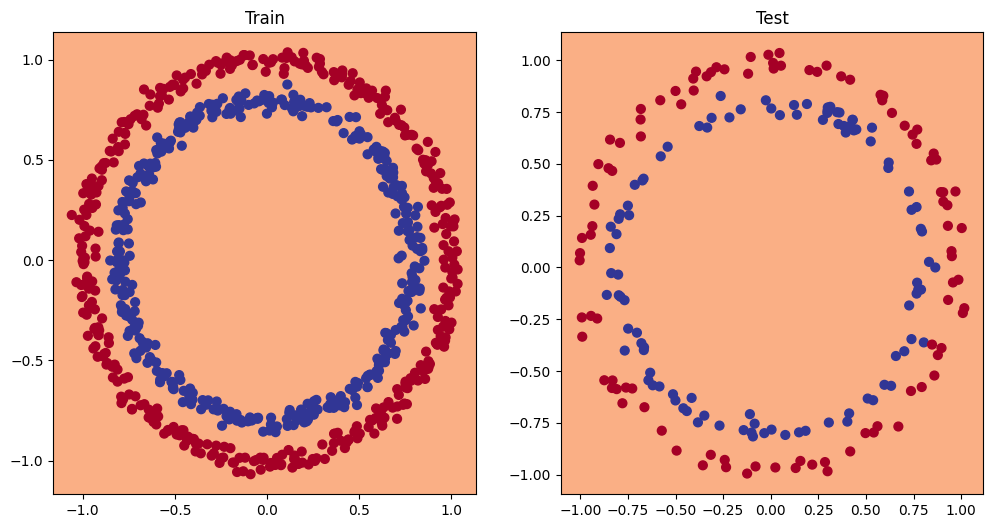

In [136]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [138]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.relu_layer_1 = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.relu_layer_2 = nn.ReLU()
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.relu_layer_2(self.layer_2(self.relu_layer_1(self.layer_1(x)))))

In [139]:
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu_layer_1): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (relu_layer_2): ReLU()
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [168]:
loss_fn = nn.BCEWithLogitsLoss() # This is the Sigmoid Function
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

In [169]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

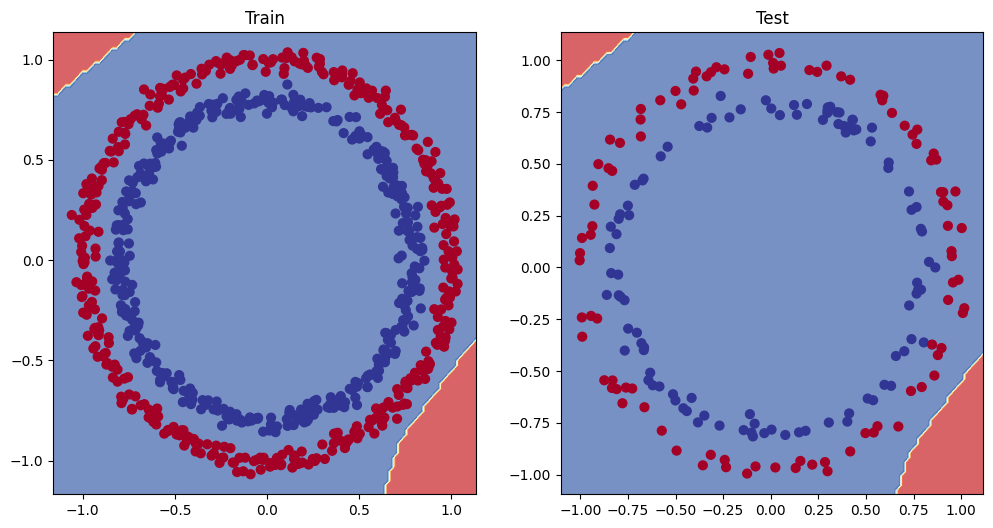

In [170]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [185]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [186]:
model = CircleModelV2().to(device)
model

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [187]:
loss_fn = nn.BCEWithLogitsLoss() # This is the Sigmoid Function
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [188]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69203, Test Acc: 55.50%
Epoch: 100 | Loss: 0.17334, Acc: 99.62% | Test Loss: 0.20684, Test Acc: 99.00%
Epoch: 200 | Loss: 0.01503, Acc: 100.00% | Test Loss: 0.02743, Test Acc: 100.00%
Epoch: 300 | Loss: 0.00581, Acc: 100.00% | Test Loss: 0.01481, Test Acc: 100.00%
Epoch: 400 | Loss: 0.00317, Acc: 100.00% | Test Loss: 0.01065, Test Acc: 100.00%
Epoch: 500 | Loss: 0.00200, Acc: 100.00% | Test Loss: 0.00874, Test Acc: 100.00%
Epoch: 600 | Loss: 0.00138, Acc: 100.00% | Test Loss: 0.00754, Test Acc: 100.00%
Epoch: 700 | Loss: 0.00101, Acc: 100.00% | Test Loss: 0.00677, Test Acc: 100.00%
Epoch: 800 | Loss: 0.00076, Acc: 100.00% | Test Loss: 0.00622, Test Acc: 100.00%
Epoch: 900 | Loss: 0.00060, Acc: 100.00% | Test Loss: 0.00579, Test Acc: 100.00%


In [189]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

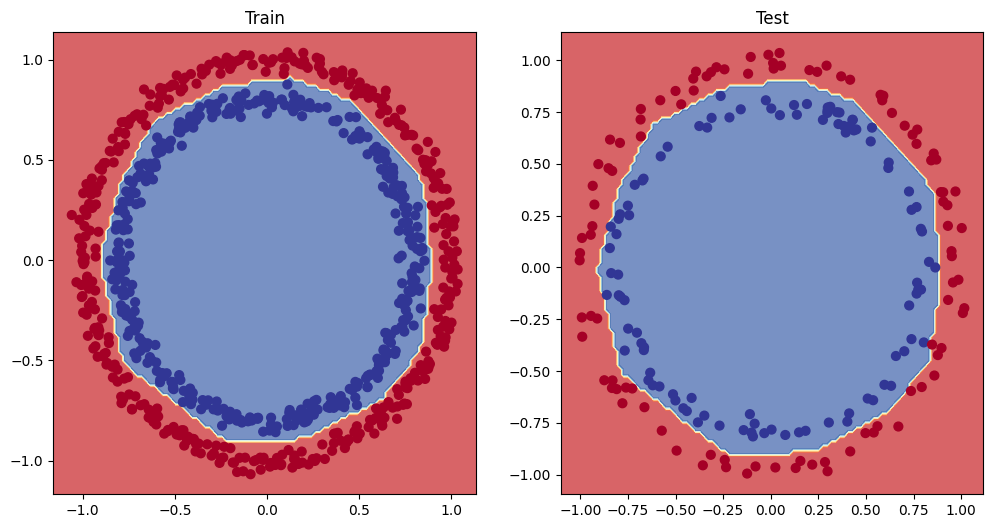

In [191]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

### Multiclass Classification with Neural Nets

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


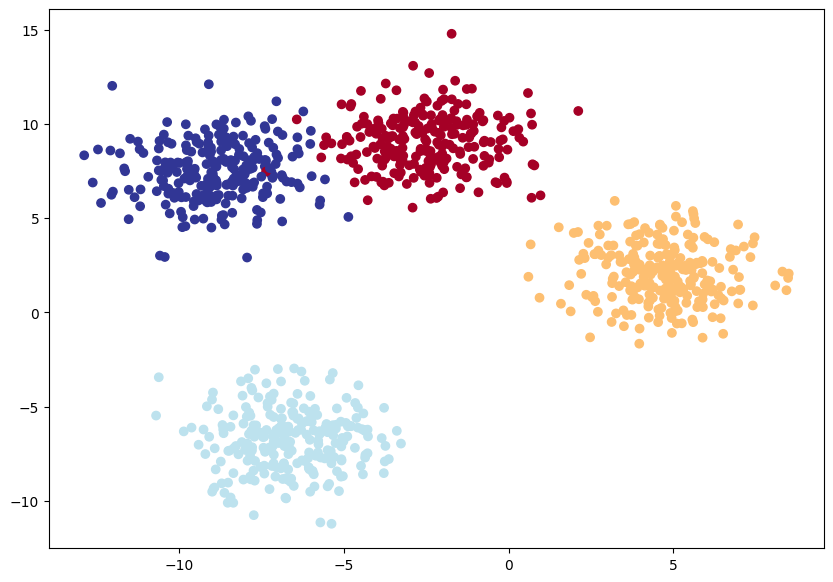

In [192]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [194]:
y_blob.unique()

tensor([0, 1, 2, 3])

In [197]:
class MultiClassClassifier(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


In [199]:
multiclass_model = MultiClassClassifier(input_features=2, output_features=4, hidden_units=10).to(device)
multiclass_model

MultiClassClassifier(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [201]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=multiclass_model.parameters(), lr=0.01)

In [203]:
# Make prediction logits with model
y_logits = multiclass_model(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.3943, -0.6665, -0.2394,  0.3599],
        [-0.6001,  0.4259,  0.2560, -0.4897],
        [-0.2204, -0.0991, -0.3617,  0.2989],
        [-0.2461, -0.2544, -0.1741,  0.2059],
        [-0.5316, -0.7351, -0.0714, -0.1435]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1978, 0.1507, 0.2310, 0.4205],
        [0.1377, 0.3843, 0.3242, 0.1538],
        [0.2138, 0.2413, 0.1856, 0.3593],
        [0.2156, 0.2138, 0.2317, 0.3388],
        [0.2052, 0.1674, 0.3250, 0.3024]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [204]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [205]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1978, 0.1507, 0.2310, 0.4205], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


In [209]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    multiclass_model.train()

    # 1. Forward pass
    y_logits = multiclass_model(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_blob_train,
                      y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    multiclass_model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = multiclass_model(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_blob_test,
                             test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.73795, Acc: 0.12% | Test Loss: 1.59132, Test Acc: 1.00%
Epoch: 10 | Loss: 1.03717, Acc: 54.25% | Test Loss: 0.98334, Test Acc: 59.50%
Epoch: 20 | Loss: 0.73029, Acc: 72.75% | Test Loss: 0.69971, Test Acc: 71.50%
Epoch: 30 | Loss: 0.46193, Acc: 85.62% | Test Loss: 0.45630, Test Acc: 91.00%
Epoch: 40 | Loss: 0.28577, Acc: 98.88% | Test Loss: 0.28116, Test Acc: 99.00%
Epoch: 50 | Loss: 0.12989, Acc: 99.38% | Test Loss: 0.11475, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04736, Acc: 99.50% | Test Loss: 0.03645, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02967, Acc: 99.50% | Test Loss: 0.01940, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02475, Acc: 99.50% | Test Loss: 0.01388, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02347, Acc: 99.50% | Test Loss: 0.01248, Test Acc: 99.50%


In [210]:
multiclass_model.eval()
with torch.inference_mode():
    y_logits = multiclass_model(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -1.0078,   5.1076,  -7.2211,  -7.2438],
        [ -1.0654, -13.6497,  -7.7018,   5.7370],
        [ -2.6563,  -9.5508,   4.3447,  -6.4751],
        [ -0.7790,   4.2285,  -5.2944,  -5.1862],
        [  0.8078,  -6.0993,  -8.3113,  -8.9887],
        [ -1.3767, -16.3340,  -8.8452,   7.9683],
        [ -2.4889,  -8.7797,   4.0397,  -6.0205],
        [  1.0268,  -7.6468,  -7.7883,  -7.1455],
        [ -3.1697, -11.6892,   5.1677,  -7.6138],
        [  0.9290,  -6.7548,  -7.9340,  -7.8475]], device='cuda:0')

In [212]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_blob_test, y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


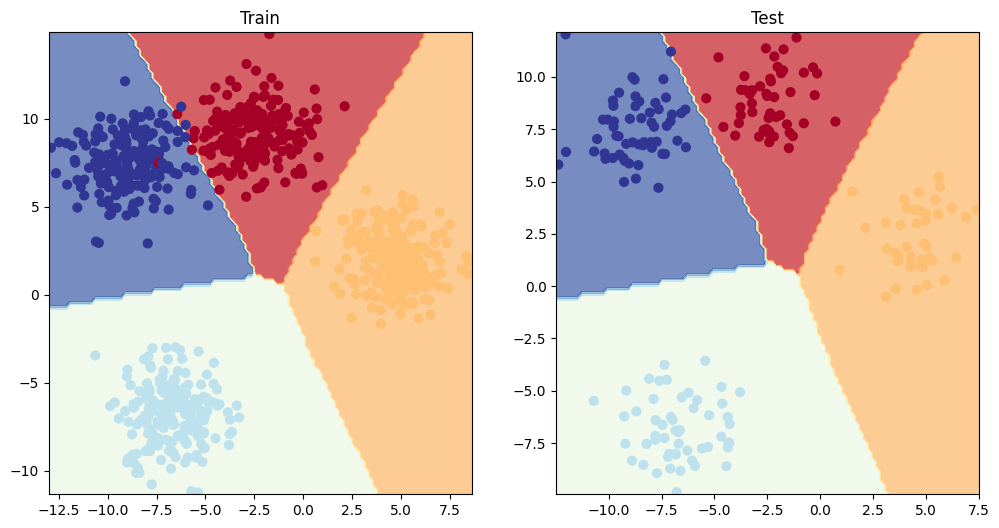

In [213]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(multiclass_model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(multiclass_model, X_blob_test, y_blob_test)

In [215]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')